In [66]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import metrics
import PIL
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the image and convert to the usable data

In [67]:
# Load train dataset
train_data = pd.read_csv('train.csv')
train_images = []
train_labels = []

for _, row in train_data.iterrows():
    image_path = row['Path']
    image = PIL.Image.open(image_path).convert('RGB')  # Convert image to RGB
    image = image.resize((32, 32))  # Resize image
    train_images.append(np.array(image))
    train_labels.append(row['ClassId'])

# Convert lists to numpy arrays
x_train = np.array(train_images)
y_train = np.array(train_labels)

# Load test dataset
test_data = pd.read_csv('test.csv')
test_images = []
test_labels = []

for _, row in test_data.iterrows():
    image_path = row['Path']
    image = PIL.Image.open(image_path).convert('RGB')  # Convert image to RGB
    image = image.resize((32, 32))  # Resize image
    test_images.append(np.array(image))
    test_labels.append(row['ClassId'])

# Convert lists to numpy arrays
x_test = np.array(test_images)
y_test = np.array(test_labels)

# Establis the CNN model and train it

In [68]:
# Initialize the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(43, activation='softmax'),  # 43 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1226/1226 [==============================] - 16s 13ms/step - loss: 0.9610 - accuracy: 0.7511 - val_loss: 0.5496 - val_accuracy: 0.8542
Epoch 2/10
1226/1226 [==============================] - 15s 12ms/step - loss: 0.2102 - accuracy: 0.9487 - val_loss: 0.5221 - val_accuracy: 0.8704
Epoch 3/10
1226/1226 [==============================] - 15s 12ms/step - loss: 0.1222 - accuracy: 0.9700 - val_loss: 0.4940 - val_accuracy: 0.8903
Epoch 4/10
1226/1226 [==============================] - 15s 12ms/step - loss: 0.0886 - accuracy: 0.9782 - val_loss: 0.5343 - val_accuracy: 0.8962
Epoch 5/10
1226/1226 [==============================] - 15s 12ms/step - loss: 0.0649 - accuracy: 0.9838 - val_loss: 0.4878 - val_accuracy: 0.9063
Epoch 6/10
1226/1226 [==============================] - 15s 12ms/step - loss: 0.0521 - accuracy: 0.9862 - val_loss: 0.6211 - val_accuracy: 0.8934
Epoch 7/10
1226/1226 [==============================] - 15s 12ms/step - loss: 0.0451 - accuracy: 0.9879 - val_loss: 0.5273 -

# Using confusion matrix to show the accuracy

395/395 [==============================] - 1s 3ms/step


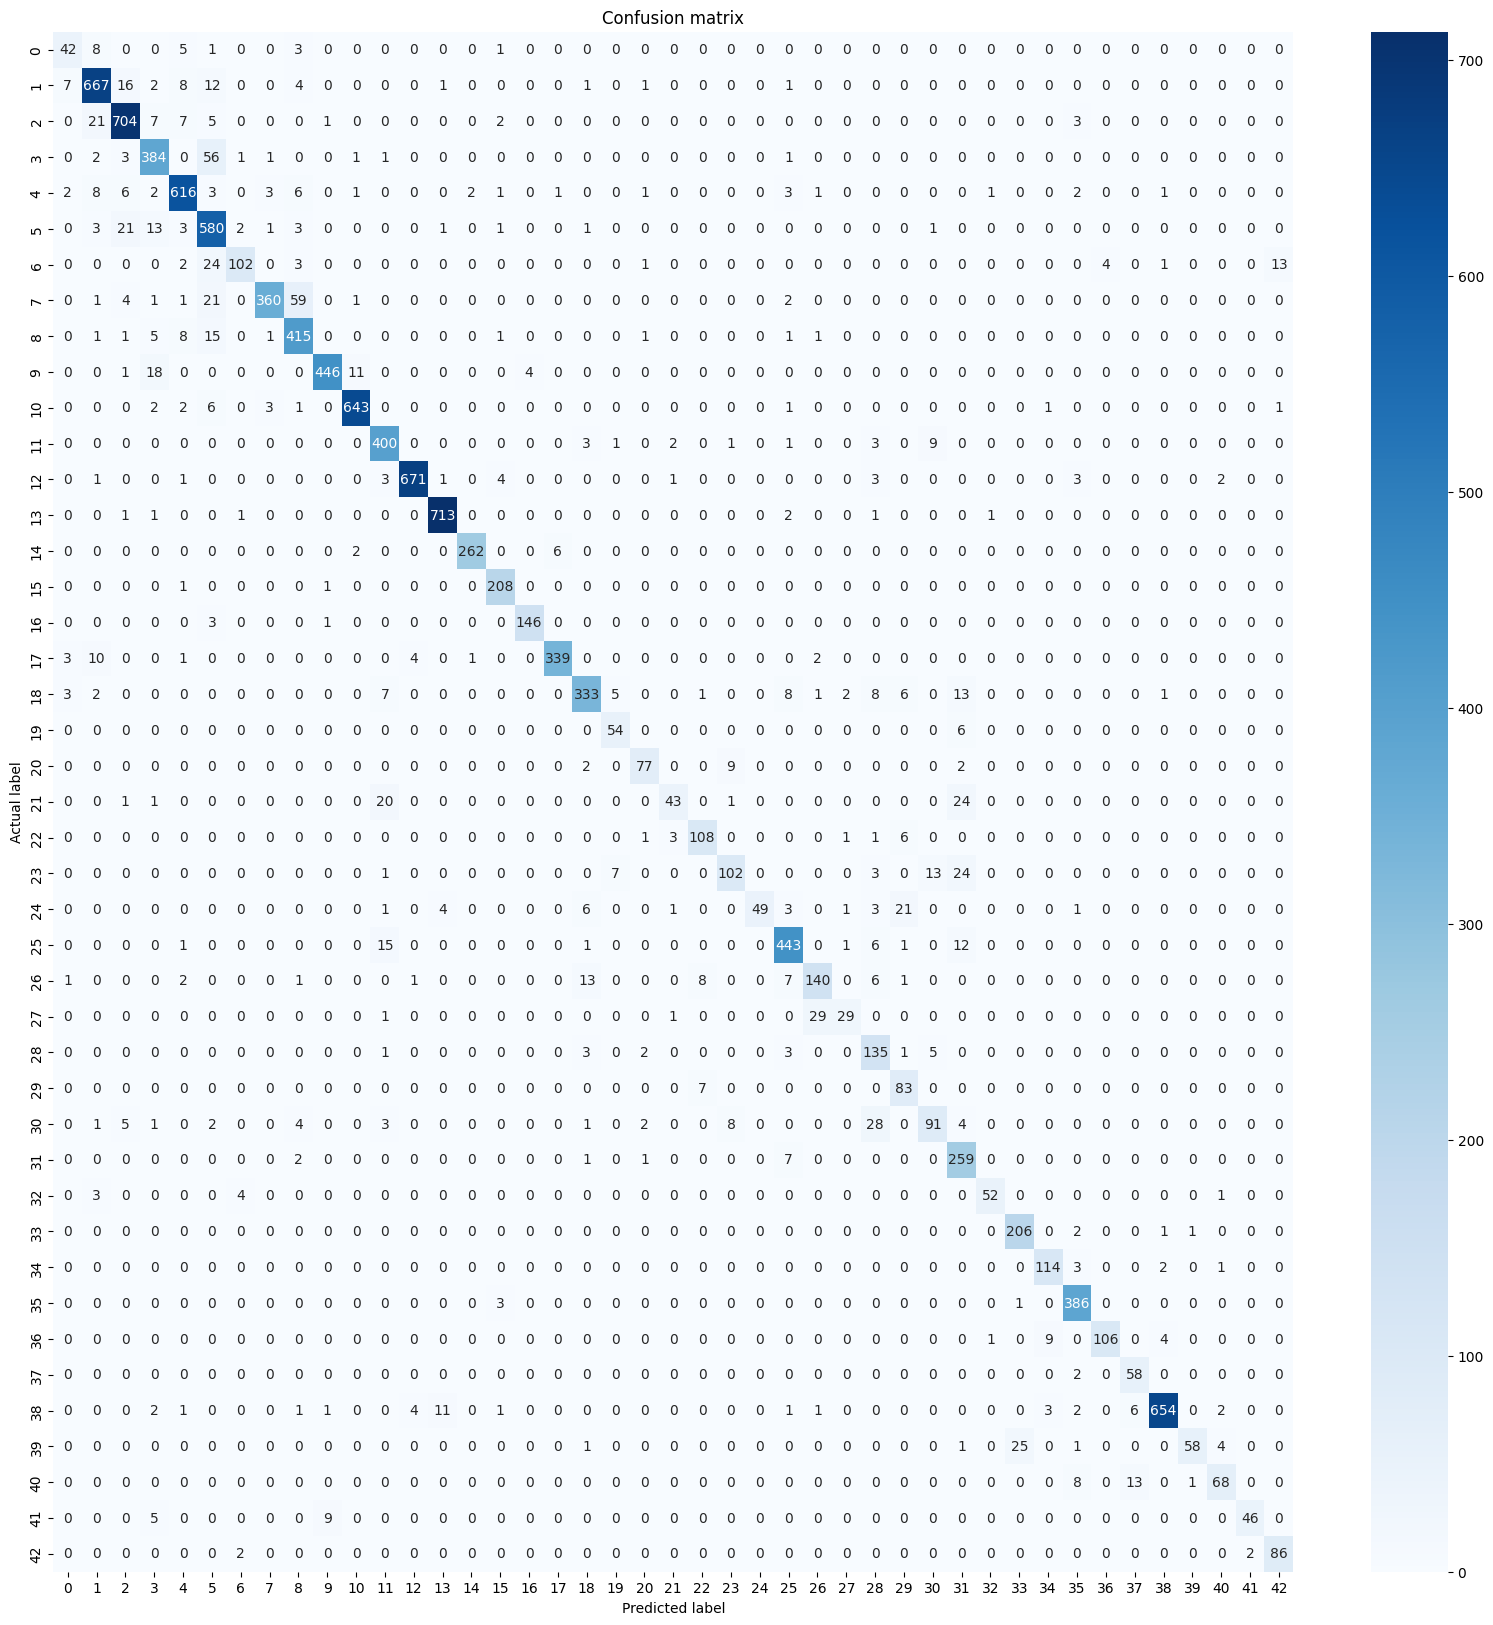

In [69]:
# Prediction labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred_classes)

# Show the Confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Building function to predict road sign
### predict_image_classes:  input the path of the image and out put the labels.
### predict_image_meaning:  input the path of the image and out put the meaning of the road sign.

In [72]:
classes_DIC = { 
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)', 
    2:'Speed limit (50km/h)', 
    3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 
    5:'Speed limit (80km/h)', 
    6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 
    8:'Speed limit (120km/h)', 
    9:'No passing', 
    10:'No passing veh over 3.5 tons', 
    11:'Right-of-way at intersection', 
    12:'Priority road', 
    13:'Yield', 
    14:'Stop', 
    15:'No vehicles', 
    16:'Veh > 3.5 tons prohibited', 
    17:'No entry', 
    18:'General caution', 
    19:'Dangerous curve left', 
    20:'Dangerous curve right', 
    21:'Double curve', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
    25:'Road work', 
    26:'Traffic signals', 
    27:'Pedestrians', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals crossing', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right', 
    39:'Keep left', 
    40:'Roundabout mandatory', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons'
}

def predict_image_classes(image_path):
    # Open and resize the image
    image = PIL.Image.open(image_path).convert('RGB')  # Convert image to RGB
    image = image.resize((32, 32))  # Resize image

    # Convert the image to a numpy array and reshape it
    image_array = np.expand_dims(np.array(image), axis=0)

    # Use the model to make a prediction
    prediction = model.predict(image_array)
    predicted_class = np.argmax(prediction)

    print()
    return predicted_class

def predict_image_meaning(image_path):
    # Open and resize the image
    image = PIL.Image.open(image_path).convert('RGB')  # Convert image to RGB
    image = image.resize((32, 32))  # Resize image

    # Convert the image to a numpy array and reshape it
    image_array = np.expand_dims(np.array(image), axis=0)

    # Use the model to make a prediction
    prediction = model.predict(image_array)
    predicted_class = np.argmax(prediction)
    meaning = classes_DIC[predicted_class]
    return meaning

def show_image(image_path):
    # Open the image
    image = Image.open(image_path)

    # Convert the image to a numpy array
    image_array = np.array(image)

    # Show the image
    plt.imshow(image_array)
    plt.show()



# Try these function

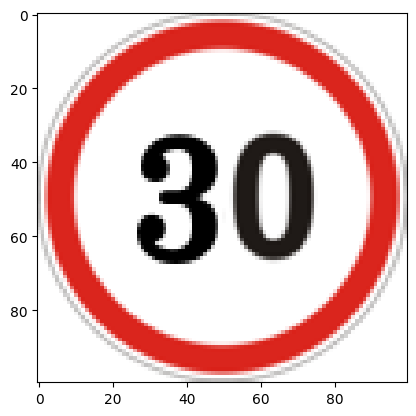

1/1 [==============================] - 0s 34ms/step

1
1/1 [==============================] - 0s 21ms/step
Speed limit (30km/h)


In [84]:
image_path = 'Meta/1.png'


show_image(image_path)
print(predict_image_classes(image_path))
print(predict_image_meaning(image_path))